In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv("Wine_Quality_Data.csv")

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [136]:
#check for missing values

info = pd.DataFrame(df.isnull().sum(),columns=["isNull"])
info.insert(1,"isNa",df.isna().sum(),True)
info.insert(2,"duplicate", df.duplicated().sum(),True)
info.insert(3, "unique", df.nunique(),True)
info

,isNull,isNa,duplicate,unique
fixed_acidity,0,0,1177,106
volatile_acidity,0,0,1177,187
citric_acid,0,0,1177,89
residual_sugar,0,0,1177,316
chlorides,0,0,1177,214
free_sulfur_dioxide,0,0,1177,135
total_sulfur_dioxide,0,0,1177,276
density,0,0,1177,998
pH,0,0,1177,108
sulphates,0,0,1177,111


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Preprocessing

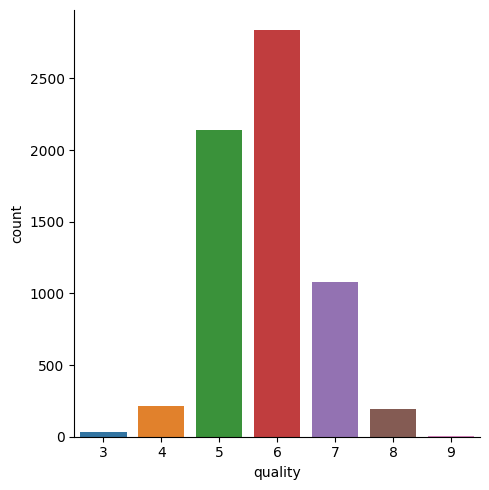

In [138]:
df1 = df.copy()

#plot for each quality

plot = sns.catplot(x='quality',data=df1,kind="count")

In [139]:
df["quality"].value_counts()
df['color'].unique()


array(['red', 'white'], dtype=object)

In [140]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['color'] = label_encoder.fit_transform(df['color'])

df['color'].unique()

array([0, 1])

In [141]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

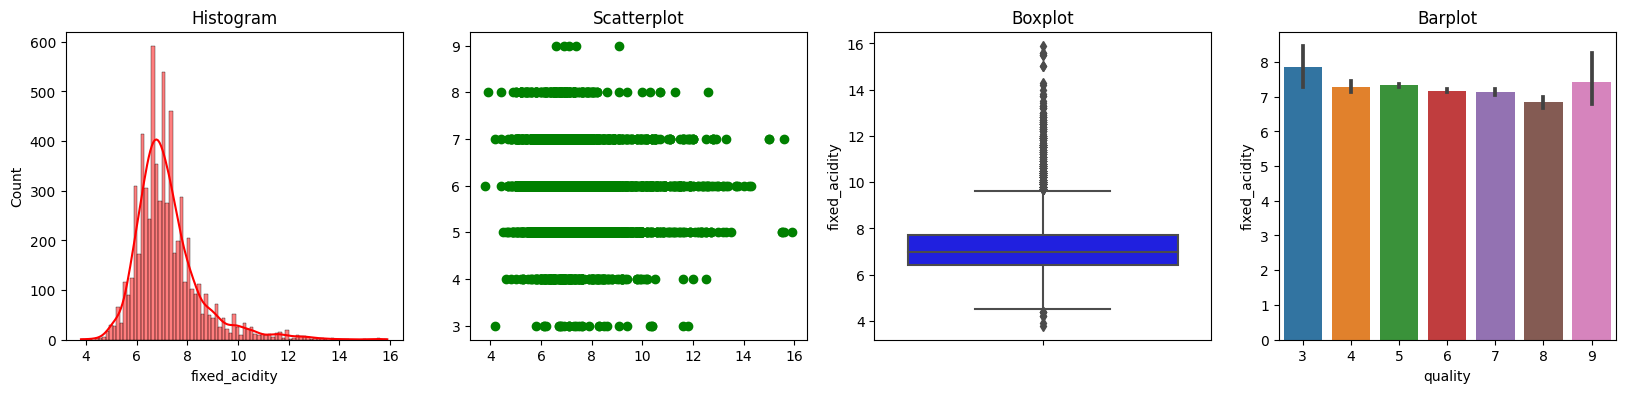

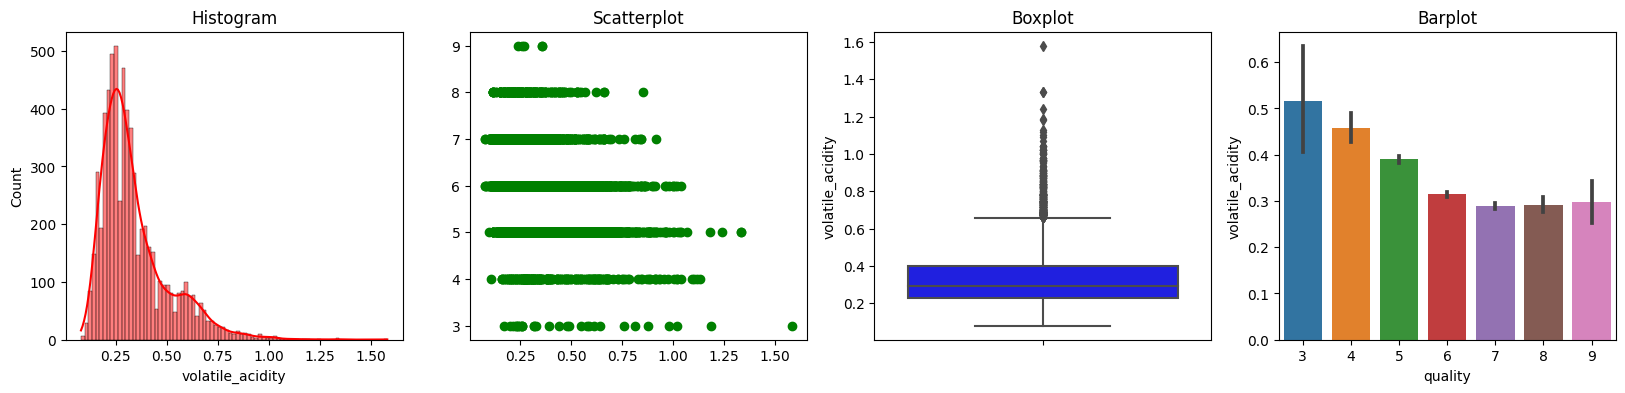

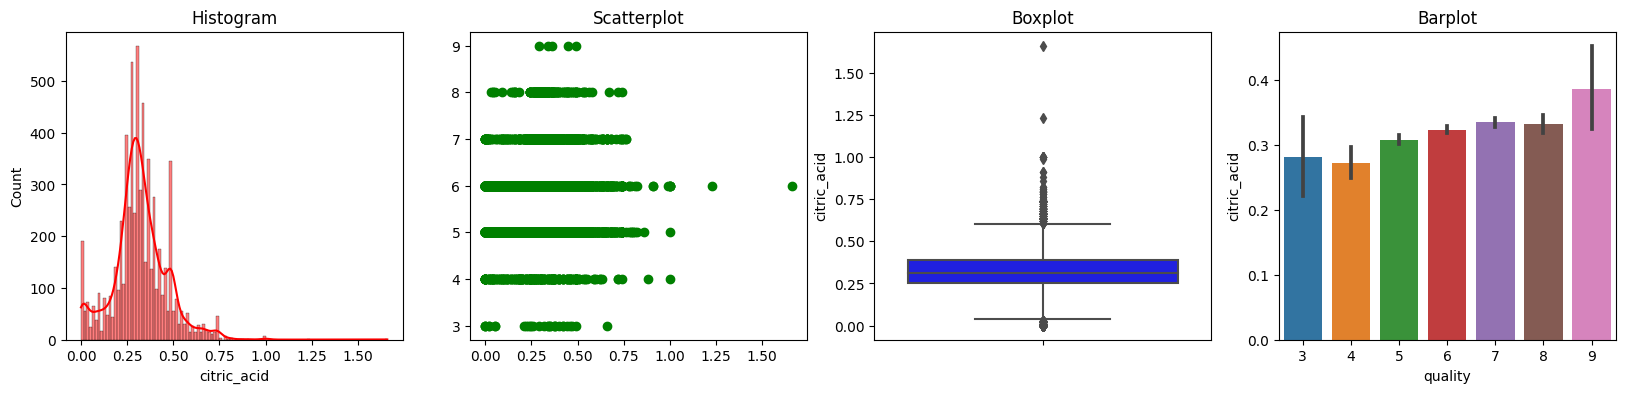

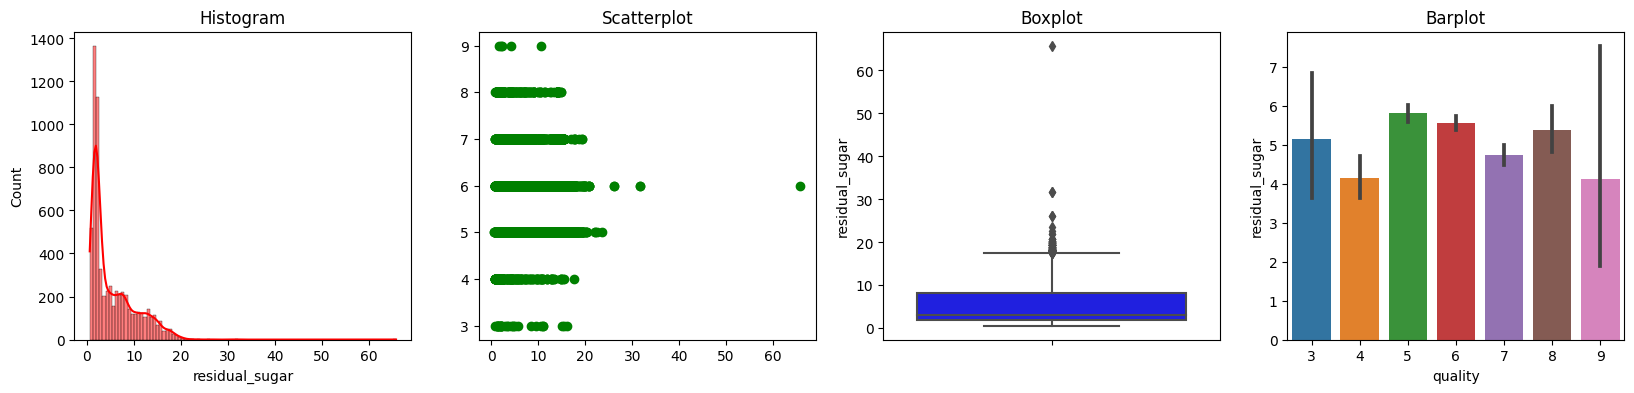

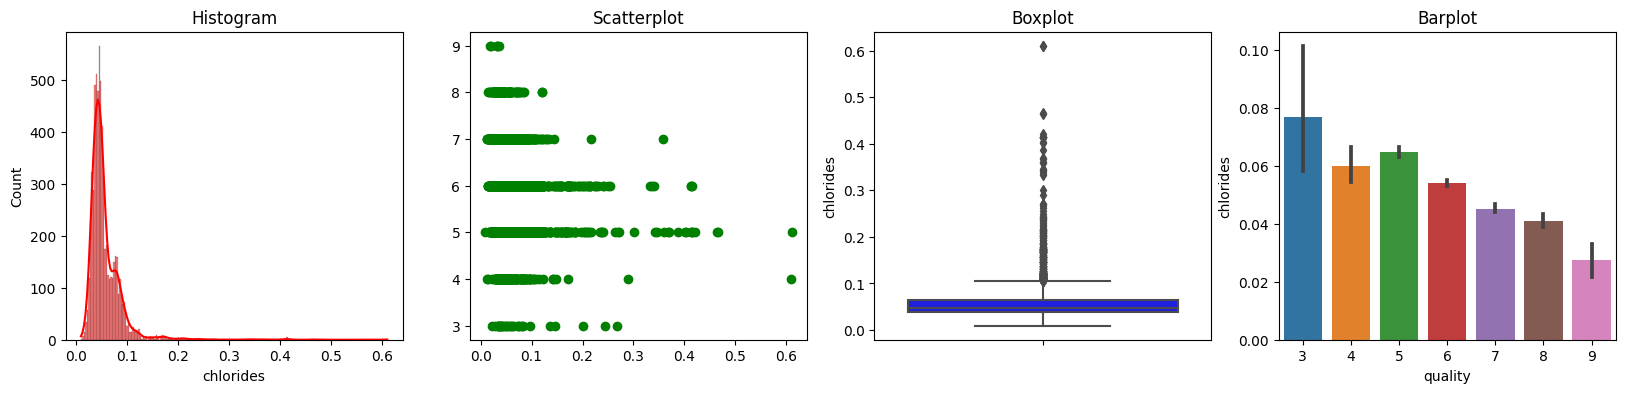

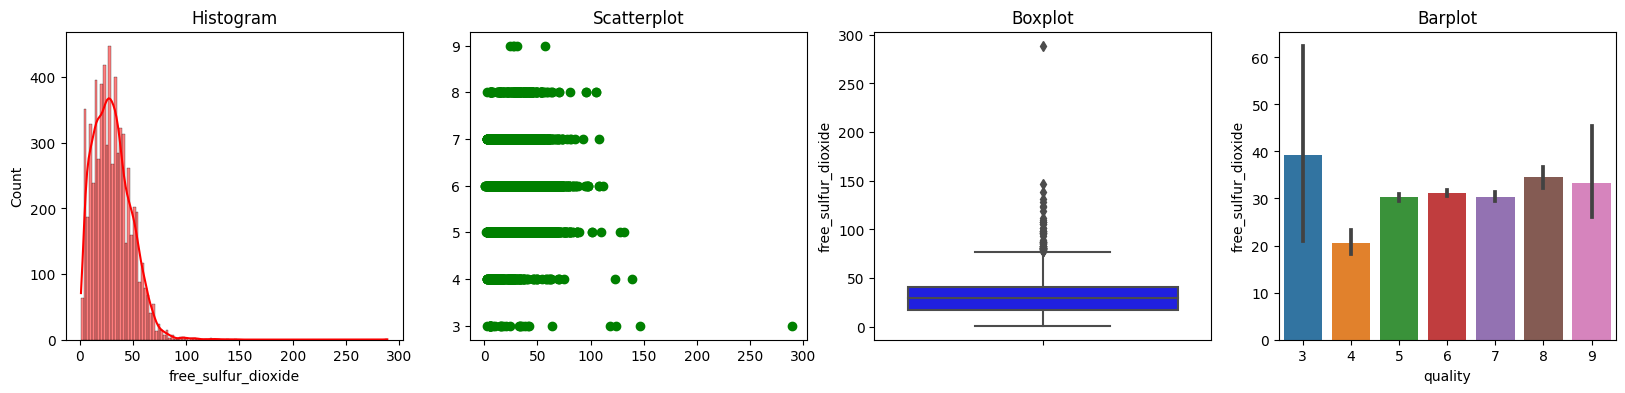

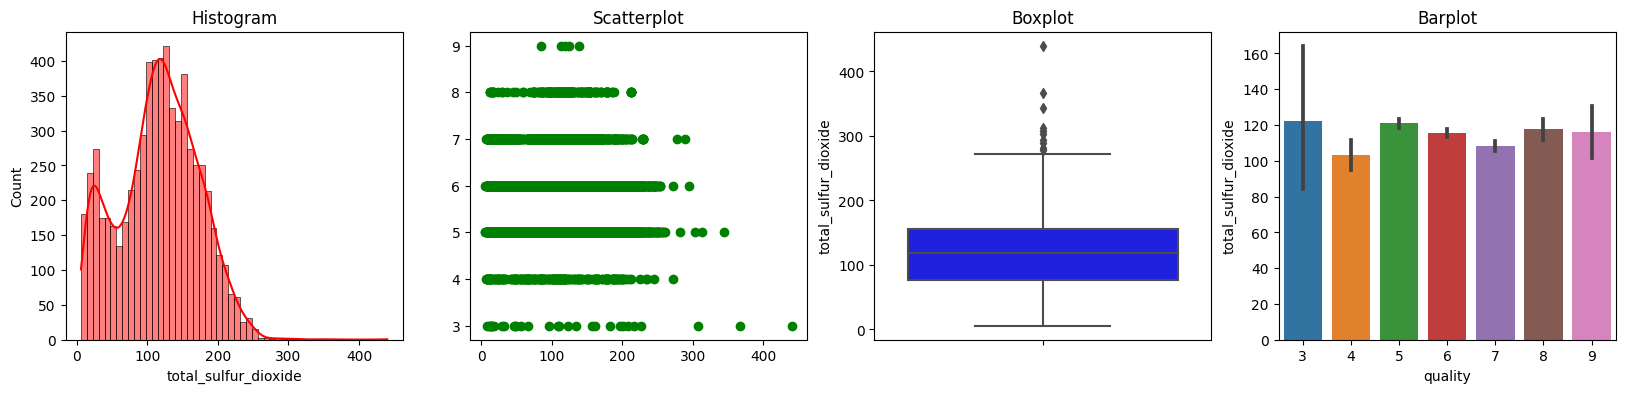

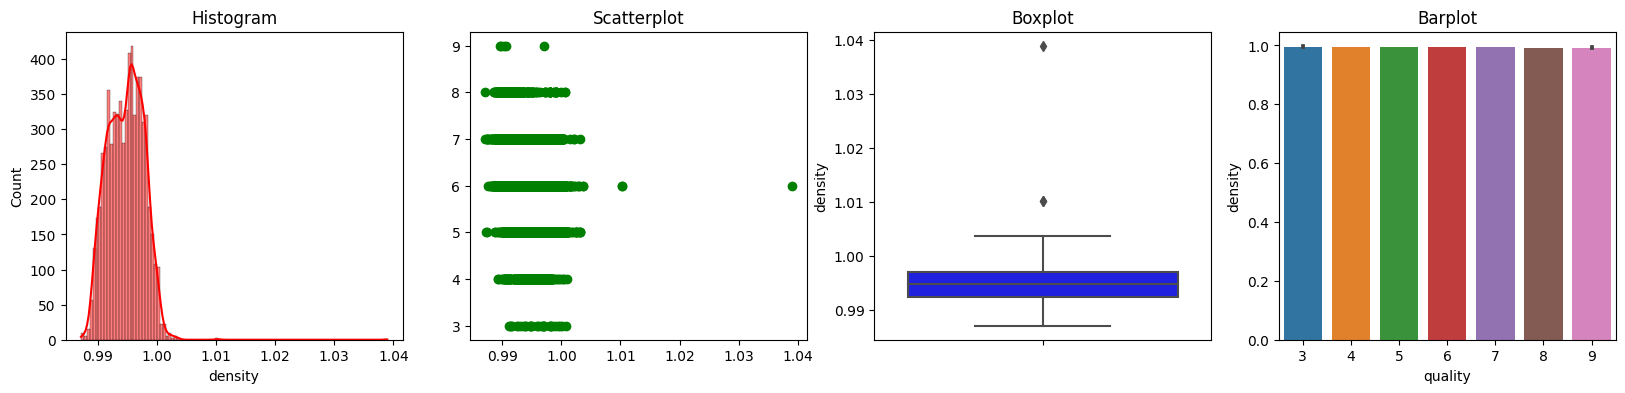

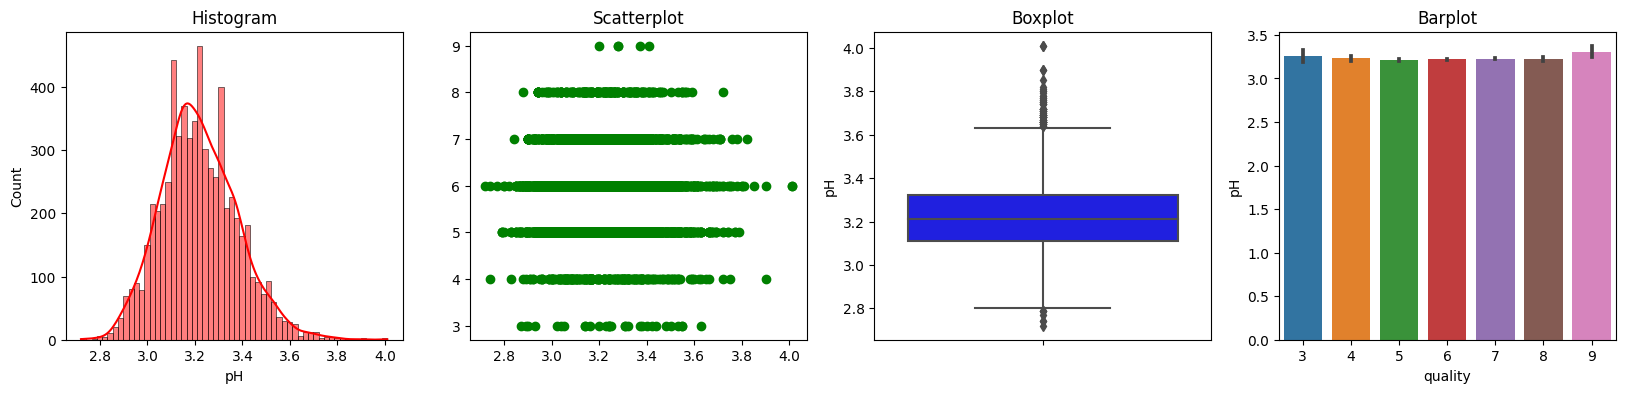

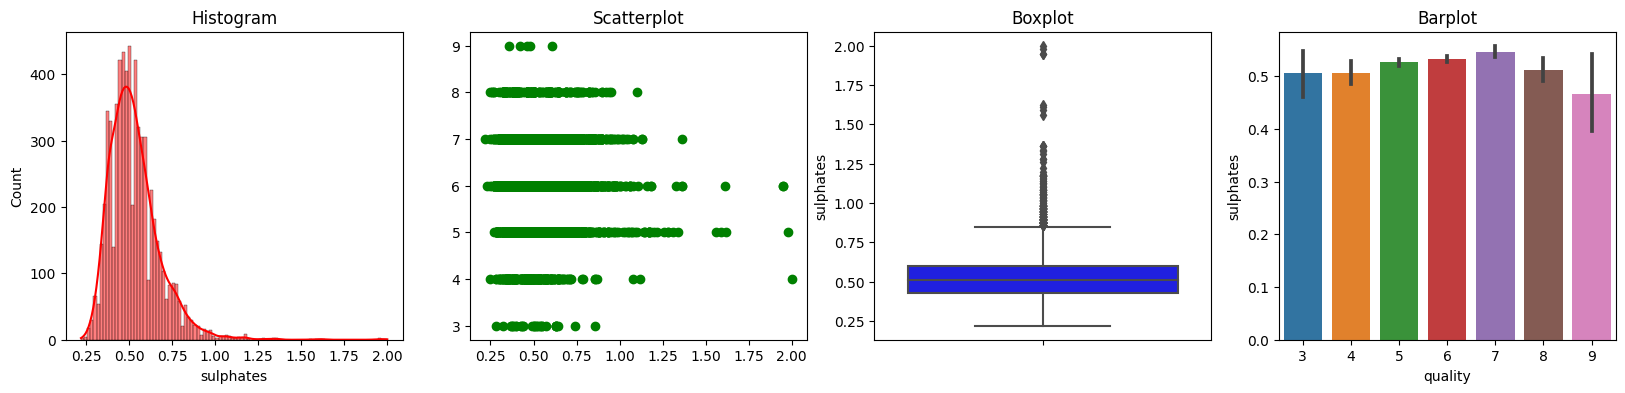

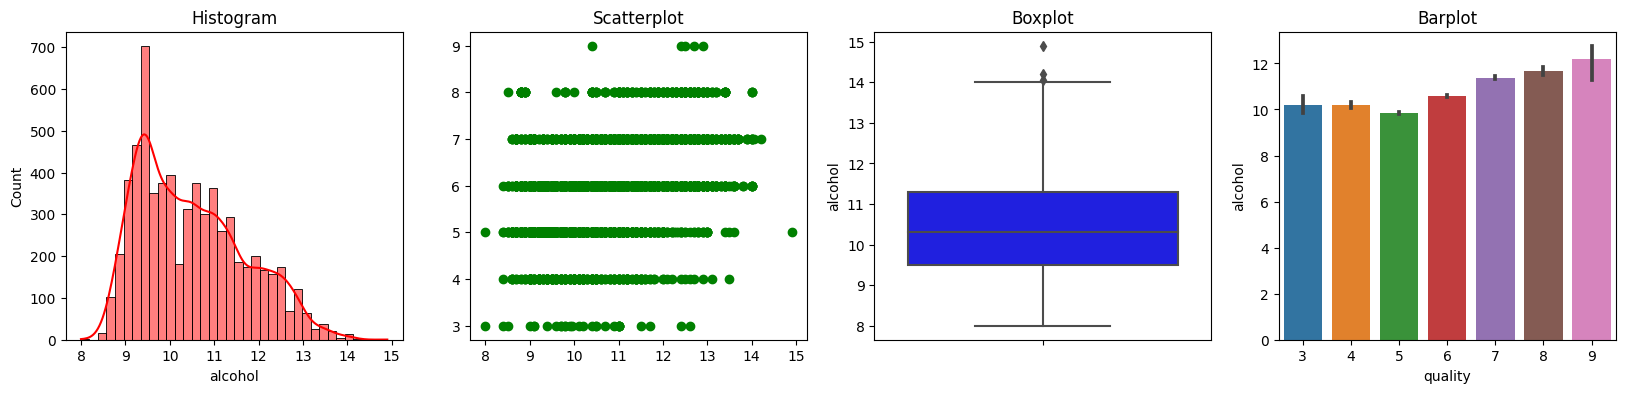

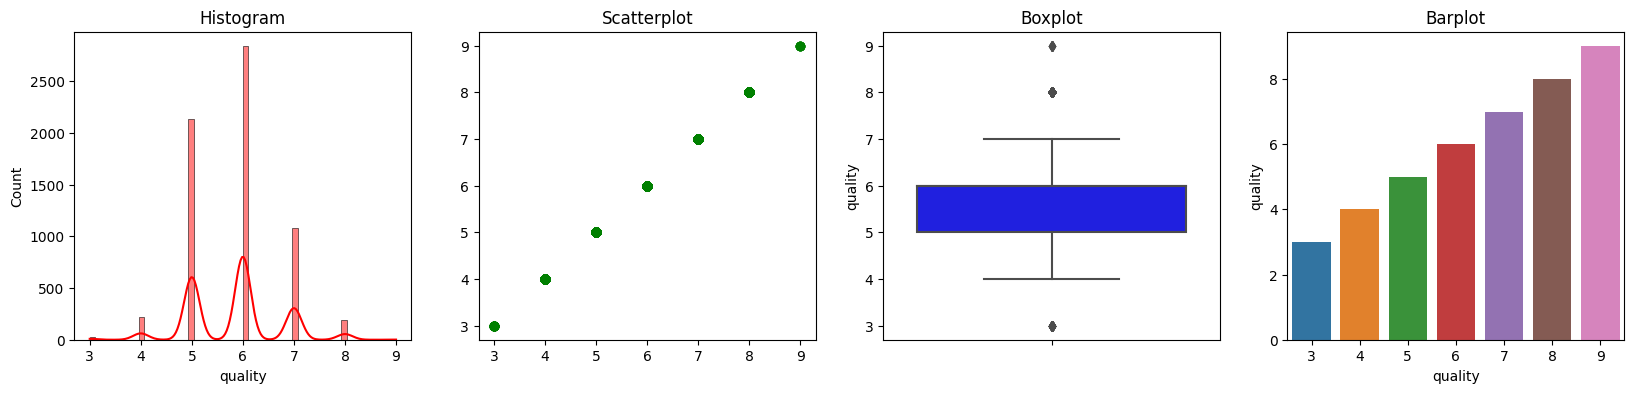

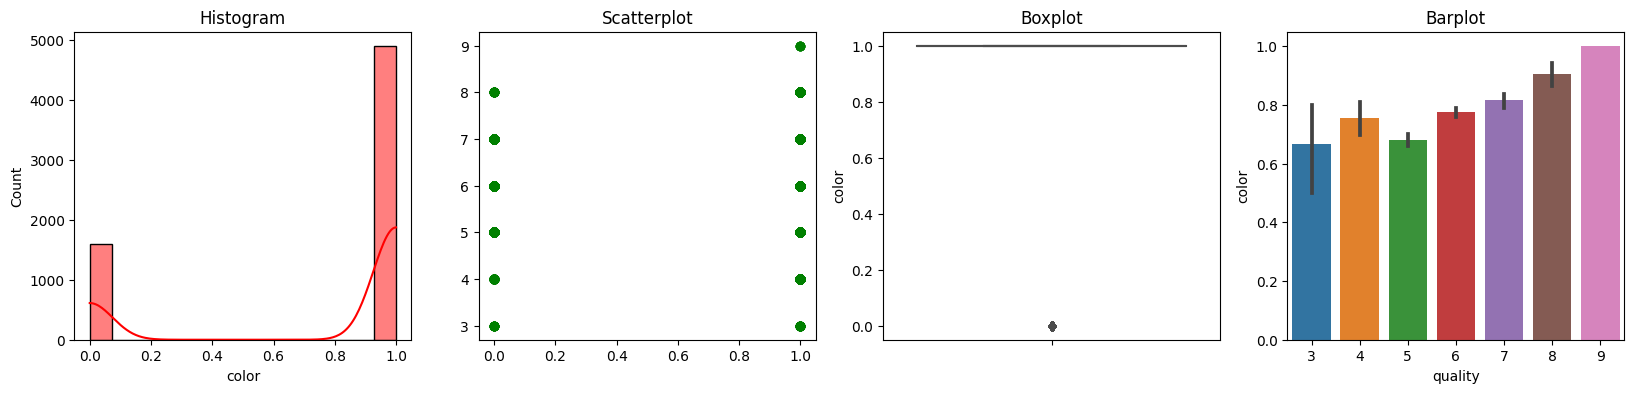

In [142]:
for features in df:
    diagnostic_plots(df,features,'quality')

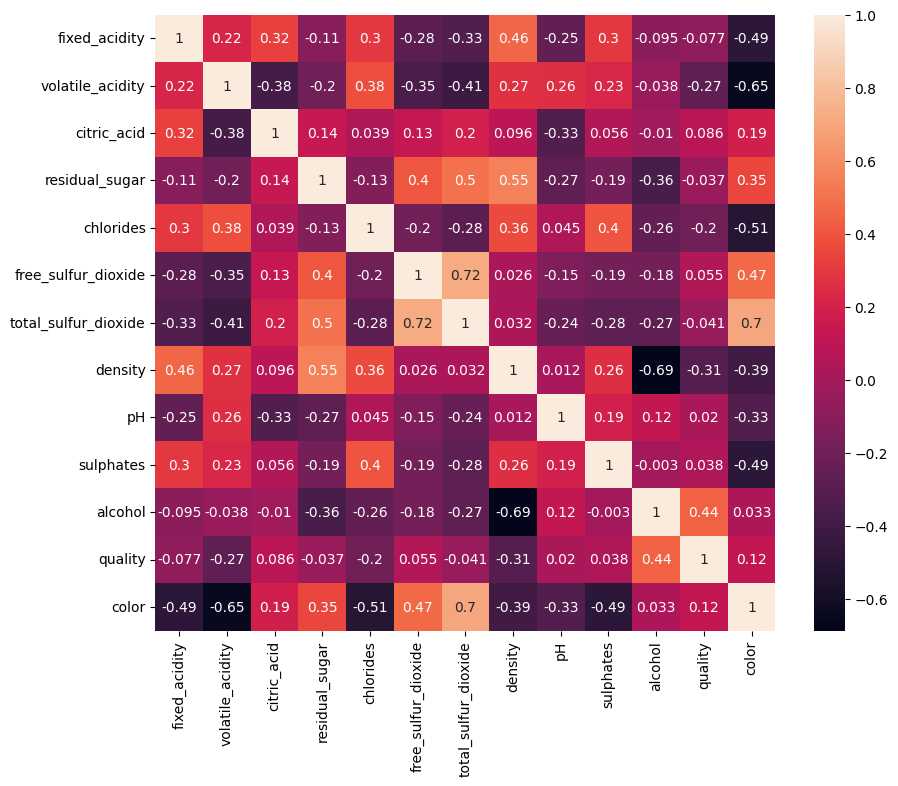

In [143]:
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(10,8))
# sb.heatmap(df.corr(),
#             annot=True,
#             linewidths=.5,
#             center=0,
#             cbar=False,
#             cmap="YlGnBu")
sb.heatmap(df.corr(),
            annot=True,)
plt.show()

In [144]:
df.drop_duplicates()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [145]:
df.drop('total_sulfur_dioxide',axis=1,inplace=True)

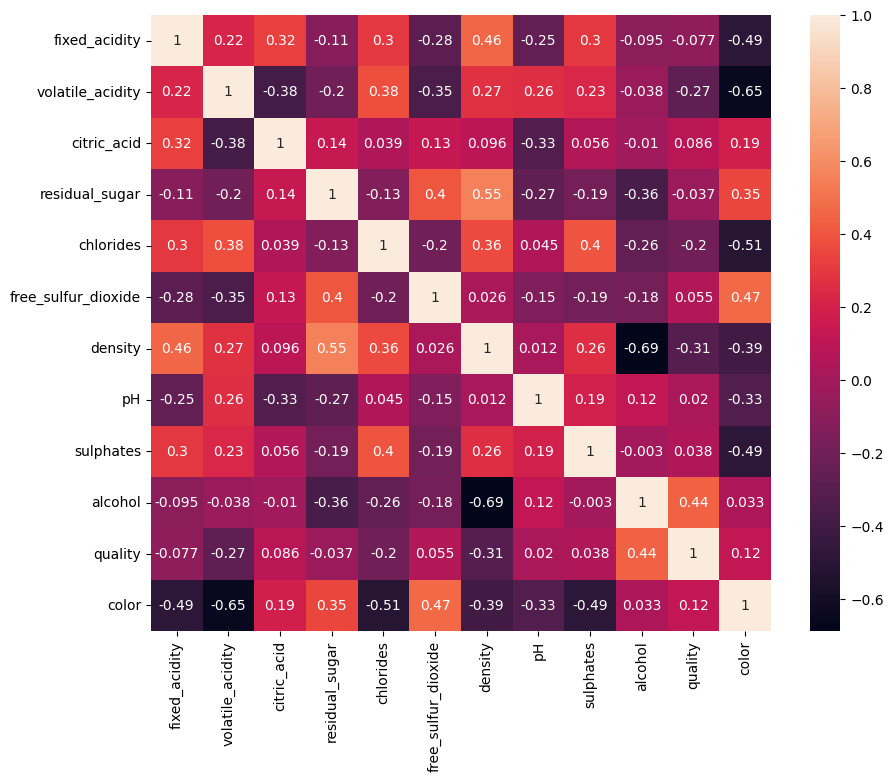

In [146]:
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(10,8))
# sb.heatmap(df.corr(),
#             annot=True,
#             linewidths=.5,
#             center=0,
#             cbar=False,
#             cmap="YlGnBu")
sb.heatmap(df.corr(),
            annot=True,)
plt.show()

In [147]:
# Z = df.drop('color',axis=1)
# array = Z.values
X = df.drop('quality',axis=1)
Y = df['quality'].apply(lambda x: 1 if x>=7 else 0)
Y.value_counts(normalize=True)

quality
0    0.803448
1    0.196552
Name: proportion, dtype: float64

In [148]:
from imblearn.under_sampling import EditedNearestNeighbours
undersample = EditedNearestNeighbours()

# Undersample the data
X_undersampled, y_undersampled = undersample.fit_resample(X, Y)

# Print the shape of the undersampled data
print(X_undersampled.shape)
print(y_undersampled.shape)

(5037, 11)
(5037,)


In [149]:
X = X_undersampled
Y = y_undersampled
Y.value_counts(normalize=True)

quality
0    0.746476
1    0.253524
Name: proportion, dtype: float64

In [150]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
Y_train.head()

4979    1
463     0
2369    0
3194    0
2063    0
Name: quality, dtype: int64

Scaling Data

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# scaler.fit(X)

Training Data with RandomForest

In [152]:
#train a decision tree classifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(n_estimators=100,random_state=42)

dt.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [153]:
y_pred = dt.predict(X_test_scaled)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)
print("f1 score :", f1_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Accuracy: 0.9067460317460317
f1 score : 0.8016877637130801
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       766
           1       0.82      0.79      0.80       242

    accuracy                           0.91      1008
   macro avg       0.88      0.87      0.87      1008
weighted avg       0.91      0.91      0.91      1008



Training data with XGBoost

In [154]:
import xgboost as xgb
model1 =xgb.XGBClassifier(random_state=42)
model1.fit(X_train_scaled,Y_train)
y_pred1 = model1.predict(X_test_scaled)
print(classification_report(Y_test,y_pred1))
print("f1 score :", f1_score(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       766
           1       0.77      0.78      0.78       242

    accuracy                           0.89      1008
   macro avg       0.85      0.85      0.85      1008
weighted avg       0.89      0.89      0.89      1008

f1 score : 0.7752577319587628


Training data with decisionTree


In [155]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       766
           1       0.72      0.80      0.76       242

    accuracy                           0.88      1008
   macro avg       0.83      0.85      0.84      1008
weighted avg       0.88      0.88      0.88      1008



Select Features

In [156]:
#select the top 5 features
selector = SelectKBest(score_func=chi2,k=5)


In [157]:
X_train_selected = selector.fit_transform(X_train,Y_train)
X_test_selected = selector.transform(X_test)

In [158]:
#print the top 5 features using SelectkBest
selected_features = X.columns[selector.get_support()]

print("Selected features: ", selected_features)

Selected features:  Index(['volatile_acidity', 'residual_sugar', 'chlorides', 'alcohol', 'color'], dtype='object')


In [159]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, Y)

In [160]:
selected_features_indices = selector.get_support(indices=True)
selected_features_names = X.columns[selected_features_indices]
print(selected_features_names)

Index(['volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density',
       'alcohol'],
      dtype='object')


In [161]:
dfModified = pd.DataFrame(df1["volatile_acidity"],columns=["volatile_acidity"])
# info.insert(1,"isNa",df.isna().sum(),True)
dfModified.insert(1,"residual_sugar",df1["residual_sugar"],True)
dfModified.head()

,volatile_acidity,residual_sugar
0,0.70,1.9
1,0.88,2.6
2,0.76,2.3
3,0.28,1.9
4,0.70,1.9


In [162]:
dfModified = pd.DataFrame()
i = 0
for features in selected_features_names:
    dfModified.insert(i,features,X[features],True)
    i = i+1

dfModified.head()

,volatile_acidity,residual_sugar,free_sulfur_dioxide,density,alcohol
0,0.70,1.9,11.0,0.9978,9.4
1,0.88,2.6,25.0,0.9968,9.8
2,0.76,2.3,15.0,0.9970,9.8
3,0.70,1.9,11.0,0.9978,9.4
4,0.66,1.8,13.0,0.9978,9.4


train the new dataset

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(dfModified,Y, test_size=0.2,random_state=42)

In [164]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
dt.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [165]:
y_pred = dt.predict(X_test_scaled)
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)
print("f1 score :", f1_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Accuracy: 0.8938492063492064
f1 score : 0.772823779193206
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       766
           1       0.79      0.75      0.77       242

    accuracy                           0.89      1008
   macro avg       0.86      0.85      0.85      1008
weighted avg       0.89      0.89      0.89      1008



hyperparametre tuning and cross validation


In [166]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer
# kf = KFold(n_splits=10)
# for train_index, test_index in kf.split(dfModified):
#     X_train, X_test = dfModified.iloc[train_index],dfModified.iloc[test_index]
#     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
#     print(X_train.info)


#define hyperparameters 
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [ 5, 10, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
}

scoring = make_scorer(accuracy_score)
#perform cross validation on the model with the hyperparam grid
grid_search = GridSearchCV(dt, hyperparameters,cv=3,scoring=scoring)
grid_search.fit(X_train_scaled, Y_train)

print('Best Hyperparams : \n', grid_search.best_params_)
y_pred5 =grid_search.predict(X_test_scaled)
print('\nClassification Report:\n', classification_report(Y_test,y_pred5))

Best Hyperparams : 
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       766
           1       0.79      0.74      0.76       242

    accuracy                           0.89      1008
   macro avg       0.85      0.84      0.85      1008
weighted avg       0.89      0.89      0.89      1008

